## Linear Regression Models
We previously considered linear regression models, i.e. models that are linear in the parameters:
$$
Y_i = \beta_0 + \beta_1 \cdot X_{i1}  + \ldots + \beta_{p-1} \cdot X_{i,p-1} + \epsilon_i
$$


## Linear Regression Models
We can see that linear models can include not only first-order models, but also more complex models. 

For instance, in *polynomial regression*, we insert higher order combinations based on the original input. An example of such a second order (quadratic) model with two predictor variables:
$$
Y_i = \beta_0 + \beta_1 \cdot X_{i1}  + \beta_2 \cdot X_{i2}  + \beta_3 \cdot X_{i1}^2 + \beta_4 X_{i1}X_{i2} + \beta_5 \cdot X_{i2}^2 + \epsilon_i
$$

## Linear Regression Models

Note that the model is still *linear* in the $\beta$ parameters. 
We simply transformed the input data prior to applying the model:
    $$
        (X_{1}, X_{2})\rightarrow (X_{1}, X_{2}, X_{1}^2, X_{1}X_{2}, X_{2}^2)
    $$

## Linear Regression Models

Also a linear model (in the parameters) would be:
$$
ln(Y_i) = \beta_0 + \beta_1 \cdot \sqrt{X_{i1}}  + \beta_2 \cdot e^{X_{i2}} + \epsilon_i
$$

## Linear Regression Models

In general, we can state a linear regression model in the form:
$$
Y_i = f(X_i, \beta) + \epsilon_i
$$
, where
$$
X_i = 
\left[    
    \begin{aligned}
    &1\\
    &X_{i1}\\  
    &\vdots\\
    &X_{i,p-1}
    \end{aligned}
\right],
\beta = \left[    
    \begin{aligned}
    &\beta_0\\
    &\beta_1\\  
    &\vdots\\
    &\beta_{p-1}
    \end{aligned}
\right]
$$
and $f(X_i, \beta)$ represents the expected value for $Y_i$, $E(Y_i)$, which, for our models is:
$$
f(X_i, \beta) = X_i^T \cdot \beta
$$


## Nonlinear Regression Models

Nonlinear regression models have the same basic form as linear regression models:
$$
Y_i = f(X_i, \beta) + \epsilon_i
$$
with the important distinction that we no longer require $f$ to be linear. 

The error terms usually are assumed to have expectation zero, constant variance and to be uncorrelated, similar to linear regression. 

## Logistic Regression - Motivation

In a variety of regression applications, the variable to be predicted has only two possible *qualitative* outcomes. 
It can therefore be represented by a binary indicator, taking on values 0 and 1.

### Examples
* In an analysis of whether business firms have an industrial relations department according to their size, the response variable can only be *True* (1) or *False* (0).
* We work as a data analyst for Emag. We are asked to find, based on the length of a customer's visit, whether he will purchase an item or not. The values can only be *Customer Purchased* (1) or *Customer Did NOT Purchase* (0).
* A study of coronary heart disease records age, gender, smoking history, cholesterol level, percent of ideal body weight and blood pressure. The response variable *Y* can only have two outcomes: *Person Developed Heart Disease* (1) or *Person Did NOT Develop Heart Disease* (0). 


## Logistic Regression - Motivation
We see that all these can be coded as 0 or 1. 

We can consider $Y_i$ a Bernoulli random variable, for which we can use the following probability distribution:
$$
\begin{align}
    P(Y_i = 1) &= \pi_i \\
    P(Y_i = 0) &= 1 - \pi_i
\end{align}
$$
, where $\pi_i \in [0,1]$. The expected value of $Y_i$ is, then:
$$
\begin{align}
E(Y_i) &= 1\cdot \pi_i + 0\cdot (1 - \pi_i) \\
       &= \pi_i
\end{align}
$$



## Logistic Regression - Motivation
Suppose we would try to apply a linear regression model to it:
$$
Y_i = \beta_0 + \beta_1 \cdot X_{i} + \epsilon_i
$$
From linear regression, we would now have:
$$
\begin{align}
    E(Y_i) &= \beta_0 + \beta_1 \cdot X_{i} \Leftrightarrow \\
    \pi_i &= \beta_0 + \beta_1 \cdot X_{i}
\end{align}
$$

So what are the problems with this?

## Logistic Regression - Motivation

1. Non-normal errors: There are only two values error $\epsilon_i$ can take:
$$
\begin{align}
    Y_i = 1 \Rightarrow \epsilon_i &= 1 - \beta_0 - \beta_1 \cdot X_{i}\\
    Y_i = 0 \Rightarrow \epsilon_i &= - \beta_0 - \beta_1 \cdot X_{i}
\end{align}
$$

2. Non-constant error variation: We can show that $Var(\epsilon_i)$ depends on $X_i$, which means you get different sized variances for different levels of $X$
3. Constraints on response function (this is the really big one): $\pi_i$ should be constrained to $[0,1]$, but $\beta_0 + \beta_1 \cdot X_{i}$ is not naturally constrained to this interval.

## Logistic Regression - Logistic Sigmoid

One of the more important nonlinear regression models is the *logistic regression model*. This is based on the *logistic sigmoid* function. In its basic form this is:
$$
    \sigma:\mathbb{R}\rightarrow (0, 1): \sigma(s) = \frac{1}{1 + e^{-s}}
$$

### Exercise
Plot $\sigma(s)$ for $s \in [-10, 10]$

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math

mpl.style.use('seaborn')
s_vals = np.arange(-10., 10., 0.2)

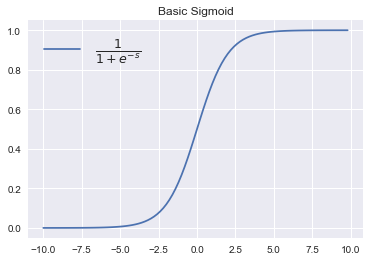

In [2]:
plt.close()

ax = plt.gca()

sigmoid_lam = lambda x: 1.0 / (1.0 + math.exp(-x))

sigmoid_vals = np.vectorize(sigmoid_lam)(s_vals)

ax.plot(s_vals, sigmoid_vals, label=r'$\frac{1}{1 + e^{-s}}$')
ax.set_title('Basic Sigmoid')
ax.legend(prop={'size': 18}, frameon=False)

plt.show()

### Exercise
Plot the following functions on the same chart:
1. $\sigma_0(s) = \frac{1}{1 + e^{-s}}$
1. $\sigma_1(s) = \frac{1}{1 + e^{-s + 1.0}}$
1. $\sigma_2(s) = \frac{1}{1 + e^{-s - 2.5}}$

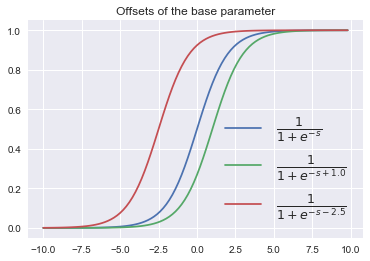

In [3]:
plt.close()

ax = plt.gca()
ax.plot(s_vals, sigmoid_vals, label=r'$\frac{1}{1 + e^{-s}}$')

sigmoid_lam_offset_1 = lambda x: 1.0 / (1.0 + math.exp(-x + 1.0))
ax.plot(s_vals, np.vectorize(sigmoid_lam_offset_1)(s_vals), label=r'$\frac{1}{1 + e^{-s + 1.0}}$')

sigmoid_lam_offset_2 = lambda x: 1.0 / (1.0 + math.exp(-x - 2.5))
ax.plot(s_vals, np.vectorize(sigmoid_lam_offset_2)(s_vals), label=r'$\frac{1}{1 + e^{-s - 2.5}}$')

ax.legend(prop={'size': 18}, frameon=False)
ax.set_title('Offsets of the base parameter')

plt.show()

### Exercise

Plot the following functions on the same chart:
1. $\sigma_0(s) = \frac{1}{1 + e^{-s}}$
1. $\sigma_1(s) = \frac{1}{1 + e^{-2s}}$
1. $\sigma_2(s) = \frac{1}{1 + e^{-\frac{s}{3}}}$

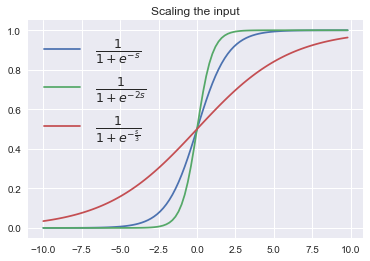

In [4]:
plt.close()

ax = plt.gca()
ax.plot(s_vals, sigmoid_vals, label=r'$\frac{1}{1 + e^{-s}}$')

sigmoid_lam_scaled_1 = lambda x: 1.0 / (1.0 + math.exp(-2.0 * x))
ax.plot(s_vals, np.vectorize(sigmoid_lam_scaled_1)(s_vals), label=r'$\frac{1}{1 + e^{-2s}}$')

sigmoid_lam_scaled_1 = lambda x: 1.0 / (1.0 + math.exp(-x/3.0))
ax.plot(s_vals, np.vectorize(sigmoid_lam_scaled_1)(s_vals), label=r'$\frac{1}{1 + e^{-\frac{s}{3}}}$')

ax.legend(prop={'size': 18})
ax.set_title('Scaling the input')

plt.show()

### Exercise

Plot the following functions on the same chart:
1. $\sigma_0(s) = \frac{1}{1 + e^{-s}}$
1. $\sigma_1(s) = \frac{1}{1 + e^{s}}$

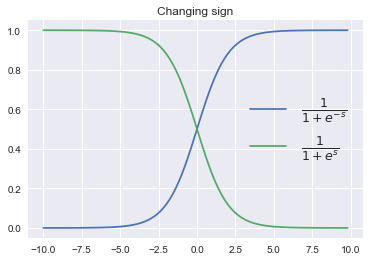

In [5]:
plt.close()

ax = plt.gca()

ax.plot(s_vals, sigmoid_vals, label=r'$\frac{1}{1 + e^{-s}}$')

sign_change_lam = lambda x: 1.0 / (1.0 + math.exp(x))
ax.plot(s_vals, np.vectorize(sign_change_lam)(s_vals), label=r'$\frac{1}{1 + e^{s}}$')

ax.legend(prop={'size': 18})
ax.set_title('Changing sign')

plt.show()


## Logistic Regression - Logistic Sigmoid

### Properties
1. The sigmoid makes a smooth transition from 0 to 1:
    * $lim_{s\rightarrow -\infty} \sigma (s) = 0$
    * $lim_{s\rightarrow \infty} \sigma (s) = 1$
2. $\sigma$ is monotone as a function of $s$
3. The center of the S-like shape makes a rapid transition from 0 to 1. We can change how *fast* this transition is made by scaling $s$.
4. We can change where a certain threshold is passed by offsetting $s$.
5. We can change the direction by changing the sign of $s$.

## Logistic Regression

The logistic regression model uses the following form for a response function:
$$
\begin{align}
    Y_i &= \sigma(-X_i^T\cdot \beta) + \epsilon_i \\
        &= \frac{1}{1 + e^{-X_i^T \cdot \beta}} + \epsilon_i
\end{align}    
$$

### Observations
1. We are simply composing the $\sigma$ function with a linear model
2. The model is now naturally constrained to $[0,1]$

## Logistic Regression - Likelihood Function

We noted that:
\begin{align}
    P(Y_i = 1) &= \pi_i \\
    P(Y_i = 0) &= 1 - \pi_i
\end{align}

This probability distribution can also be expressed as:
$$
f_i(Y_i) = \pi_i^{Y_i}\cdot (1 - \pi_i)^{1 - Y_i}, Y_i = 0,1; \forall i\in\overline{1,\ldots,n}
$$
This gives:
$$
\begin{align}
&f_i(1) = \pi_i\\
&f_i(0) = 1 - \pi_i
\end{align}
$$
So $f_i$ simply represents the probability that $Y_i$ is either 1 or 0. 

## Logistic Regression - Likelihood Function
Since all $Y_i$ are independent, their joint probability function would be:
$$
\begin{align}
    g(Y_1, \ldots, Y_n) &= \Pi_{i = 1}^n f_i(Y_i)\\
        &= \Pi_{i = 1}^n \pi_i^{Y_i}\cdot (1 - \pi_i)^{1 - Y_i}
\end{align}
$$
We can now take its logarithm to obtain:
$$
\begin{align}
    ln (g(Y_1,\ldots, Y_n)) &= ln \left[\Pi_{i = 1}^n \pi_i^{Y_i}\cdot (1 - \pi_i)^{1 - Y_i}\right]\\
        &= \sum_{i = 1}^n ln\left[ \pi_i^{Y_i}\cdot (1 - \pi_i)^{1 - Y_i} \right]\\
        &= \sum_{i = 1}^n \left[ Y_i\cdot ln(\pi_i) + (1 - Y_i)\cdot ln(1 - \pi_i)\right]\\
        &= \sum_{i = 1}^n Y_i \cdot ln(\frac{\pi_i}{1 - \pi_i}) + \sum_{i = 1}^n ln(1 - \pi_i)
\end{align}
$$


## Logistic Regression - Likelihood Function
So how can we move into finding the $\beta$ parameters for our model?
Recall that, for our model:
$$
    \pi_i = E(Y_i) = \sigma(-X_i^T\cdot \beta)
$$

Denoting $e^{-X_i^T\cdot \beta}$ with $c$, simple algebra gives us:
$$
\begin{align}
    \frac{\pi_i}{1 - \pi_i} &= \frac{1}{1 + c} \cdot \frac{1}{1 - \frac{1}{1 + c}}\\
        &= \frac{1}{1 + c} \cdot \frac{1}{\frac{c}{1 + c}}\\
        &= \frac{1}{1 + c} \cdot \frac{1 + c}{c}\\
        &= \frac{1}{c}\\
        &= \frac{1}{e^{-X_i^T\cdot \beta}}\\
        &= e^{X_i^T\cdot \beta}        
\end{align}    
$$
Also, for $1 - \pi_i$, we get:
$$
    1 - \pi_i = \frac{e^{-X_i^T\cdot \beta}}{1 + e^{-X_i^T\cdot \beta}} = \frac{1}{e^{X_i^T\cdot \beta} + 1}
$$

## Logistic Regression - Likelihood Function

We replace these back into the expression for $ln(g_{\beta})$ and we get:
$$
\begin{align}
    ln(g_{\beta}(Y_1, \ldots, Y_n)) = \sum_{i = 1}^n Y_i \cdot X_i^T\cdot \beta - \sum_{i = 1}^n ln(e^{X_i^T\cdot \beta} + 1)
\end{align}    
$$

If we want to find the model that best suites our data, we want to maximize the likelihood function. Equivalently, we can maximize its log. 

What kind of function is this log likelihood?
* The first component is linear
* What about the second component?


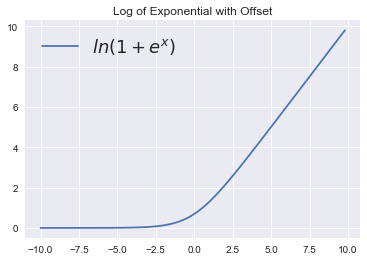

In [6]:
plt.close()

ln_exp_lambda = lambda x: math.log(math.exp(x) + 1)

ax = plt.gca()
ax.plot(s_vals, np.vectorize(ln_exp_lambda)(s_vals), label=r'$ln(1 + e^{x})$')

ax.legend(prop={'size': 18})
ax.set_title('Log of Exponential with Offset')

plt.show()

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

@np.vectorize
def biDimOffsetLog(x,y):
    return math.log(1 + math.exp(x/2.0 + y))

def plot3dLn(s_vals):
    plt.close()

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    X,Y = np.meshgrid(s_vals,s_vals)
    XY = np.dstack((X,Y))

    Z = biDimOffsetLog(X.T, Y.T)

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_title('2D Log of Exponential with Offset')

    plt.show()

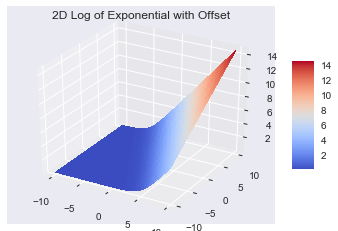

In [8]:
plot3dLn(s_vals)

## Logistic Regression - Likelihood Function

There is no closed form solution to the max of log likelihood. We have to use *numeric approximation methods*.

It is important to note that, overall, the log likelihood is concave. This means that it has a single local maxima, which is also global. The net result is that gradient-type methods lead to the maximum.

By maximizing the log likelihood function, we obtain $b = (b_0, \ldots, b_{p-1})$ (you will see it occasionally as $\hat{\beta}$), our estimator for the true $\beta$:
$$
    b = argmax_{\overline{\beta}} ln(g_{\overline{\beta}}(Y_1, \ldots, Y_n))
$$

Finally, our estimator for $\pi_i$ will be:
$$
    \hat{\pi_i} = \frac{1}{1 + e^{-X_i^T \cdot b}} = \hat{\pi}(X_i)
$$

In [9]:
import matplotlib.cm as cm

@np.vectorize
def exampleLogisticFunc(x,y):
    return 1/(1 + math.exp(-x/2.0 - y))

def plotLevelLines(s_vals):
    plt.close()
    
    X,Y = np.meshgrid(s_vals,s_vals)
    
    Z = exampleLogisticFunc(X.T, Y.T)

    fig = plt.figure()

    fig.set_size_inches(14.0, 14.0)

    levels = np.arange(0.0, 1.0, 0.1)
    CS = plt.contour(X, Y, Z,
                    levels,
                    colors = 'k',
                    )
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('The logistic function for b = (0.0, 0.5, 1.0)')

    plt.show()

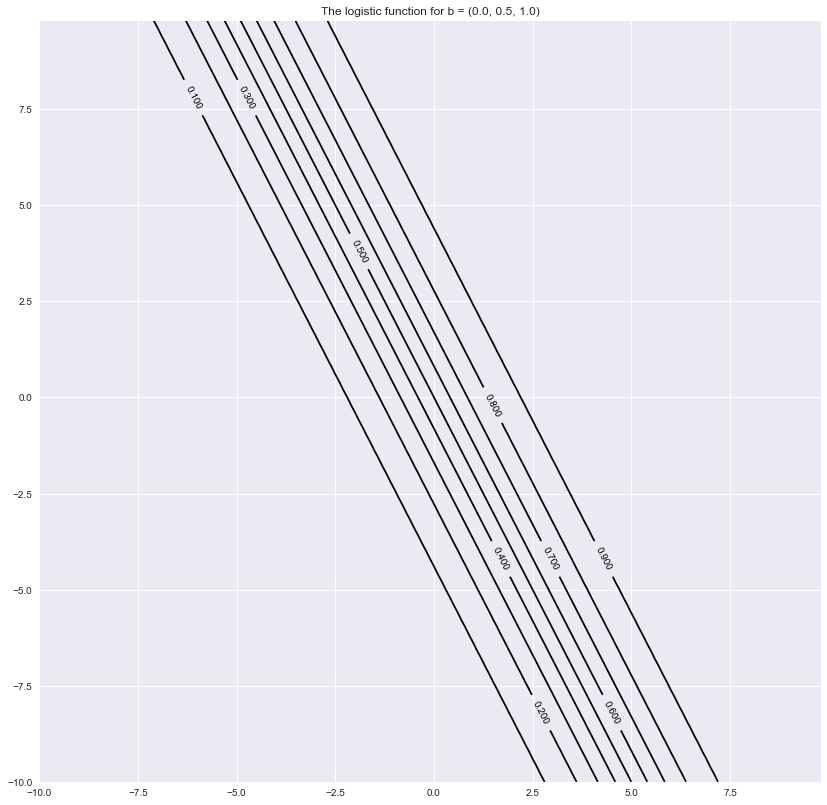

In [10]:
plotLevelLines(s_vals)

In [2]:
print(__doc__)


# Code source: Gael Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

# this is our data set, it's just a straight line with some
# Gaussian noise

def plotSigmoidAndLinear():
    xmin, xmax = -5, 5
    n_samples = 100
    np.random.seed(0)
    X = np.random.normal(size=n_samples)
    y = (X > 0).astype(np.float)
    X[X > 0] *= 4
    X += .3 * np.random.normal(size=n_samples)

    X = X[:, np.newaxis]
    # run the classifier
    clf = linear_model.LogisticRegression(C=1e5)
    clf.fit(X, y)

    # and plot the result
    plt.figure(1, figsize=(10, 10))
    plt.clf()
    plt.scatter(X.ravel(), y, color='black', zorder=20)
    X_test = np.linspace(-5, 10, 300)


    def model(x):
        return 1 / (1 + np.exp(-x))
    loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
    plt.plot(X_test, loss, color='red', linewidth=3)

    #showing what linear regression would have done
    ols = linear_model.LinearRegression()
    ols.fit(X, y)

    plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
    plt.axhline(.5, color='.5')

    plt.ylabel('y')
    plt.xlabel('X')
    plt.xticks(range(-5, 10))
    plt.yticks([0, 0.5, 1])
    plt.ylim(-.25, 1.25)
    plt.xlim(-4, 10)
    plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
               loc="lower right", fontsize='small')

    plt.show()

Automatically created module for IPython interactive environment


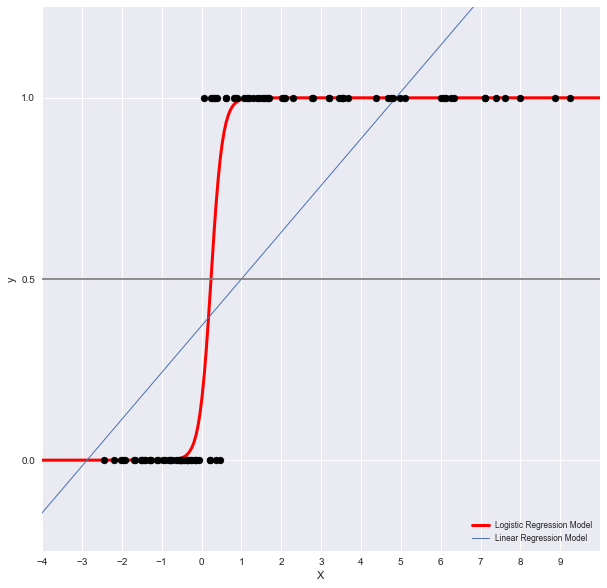

In [12]:
plotSigmoidAndLinear()

## Logistic Regression - Interpretation of Parameters

The $\frac{{\pi}(X_i)}{1 - {\pi}(X_i)}$ is also called the *odds*. Using an earlier observation:
$$
    \frac{\hat{\pi}(X_i)}{1 - \hat{\pi}(X_i)} = e^{X_i^T\cdot b } = e^{b_0 + b_1 \cdot X_{i1} + \ldots}
$$

Note that $ \hat{\pi}' = ln(odds)$ is a linear function. This is called the *logit response function* and corresponds to the inverse of the cummulative function for the distribution of $Y_i$. 

Let's focus on just $b_1$. Suppose we increase $X_{i1}$ by 1. Then:
$$
\begin{align}
    ln(odds_1) &= {b_0 + b_1 \cdot X_{i1} + \ldots}\\
    ln(odds_2) &= {b_0 + b_1 \cdot (X_{i1} + 1) + \ldots}\\
    b_1 &= ln(odds_2) - ln(odds_1) = ln(\frac{odds_2}{odds_1})\\
    e^{b_1} &= \frac{odds_2}{odds_1}   
\end{align}
$$

So $e^{b_1}$ gives the ratio change of odds.

## Logistic Regression - Variance-Covariance of Parameters

In order to make any tests based on the model we've created, we need to estimate the covariance matrix for $\beta$ - i.e. we need to estimate $E[(\beta_i - E(\beta_i))(\beta_j - E(beta_j))]$, $\forall i,j$ .

The covariance matrix can be found as the inverse for the Hessian of the log likelihood at $\beta = b$. Specifically:
$$
\begin{align}   
    g_{ij} &= \frac{\partial ^2 ln(g_{\beta})}{\partial \beta_i \partial \beta_j}\\
    s^2\{b\} &= ([-g_{ij}]_{\beta = b})^{-1}
\end{align}
$$

This estimate will usually be provided by the software you are using. The important property of our model is that, when the sample is large (>120 elements):
$$
    \frac{b_k - \beta_k}{s\{b_k\}} ~ z
$$
where $z$ is a standard random variable and $s\{b_k\} = \sqrt{s^2\{b\}_{kk}}$ is our estimate for the standard deviation of $b_k$.

This property can be used to make statistical tests for our model.


## Logistic Regression - Hosmer-Lemeshow Goodness of Fit Test

The main observation here is that, for $Y_i$ with similar values of $\hat{\pi}(X_i)$, we should have approximately $\hat{\pi}(X_i)$ of them be 1s and the rest 0s. We sort the samples by $\hat{\pi}(X_i)$ and split them into equal sized $c$ buckets. 

Hosmer and Lemeshow showed that this is well approximated by a $\chi^2$ distribution with $c - 2$ degrees of freedom. We usually pick $c$ as 5 or 10. 


In [13]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl

# read the data in
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

# take a look at the dataset
print(df.head())

# rename the 'rank' column because there is also a DataFrame method called 'rank'
df.columns = ["admit", "gre", "gpa", "prestige"]
print(df.columns)

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')


In [14]:
# summarize the data
print(df.describe())

            admit         gre         gpa   prestige
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


In [15]:
# take a look at the standard deviation of each column
print(df.std())

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64


In [16]:
# frequency table cutting presitge and whether or not someone was admitted
print(pd.crosstab(df['admit'], df['prestige'], rownames=['admit']))

prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  54  28  12


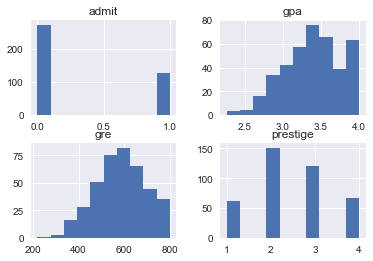

In [17]:
# plot all of the columns
plt.close()
df.hist()
plt.show()

In [18]:
# dummify rank
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print(dummy_ranks.head())

   prestige_1  prestige_2  prestige_3  prestige_4
0           0           0           1           0
1           0           0           1           0
2           1           0           0           0
3           0           0           0           1
4           0           0           0           1


In [19]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])

# manually add the intercept
data['intercept'] = 1.0
    
print(data.head())

   admit  gre   gpa  prestige_2  prestige_3  prestige_4  intercept
0      0  380  3.61           0           1           0        1.0
1      1  660  3.67           0           1           0        1.0
2      1  800  4.00           0           0           0        1.0
3      1  640  3.19           0           0           1        1.0
4      0  520  2.93           0           0           1        1.0


In [20]:
train_cols = data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit = sm.Logit(data['admit'], data[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [21]:
# we get a nice little summary
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Thu, 15 Nov 2018   Pseudo R-squ.:                 0.08292
Time:                        15:40:13   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
prestige_2    -0.6754      0.316     -2.134      0.0

In [22]:
# look at the confidence interval of each coefficient
print(result.conf_int())

                   0         1
gre         0.000120  0.004409
gpa         0.153684  1.454391
prestige_2 -1.295751 -0.055135
prestige_3 -2.016992 -0.663416
prestige_4 -2.370399 -0.732529
intercept  -6.224242 -1.755716


In [23]:
# odds ratios only
print(np.exp(result.params))

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64


In [24]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                2.5%     97.5%        OR
gre         1.000120  1.004418  1.002267
gpa         1.166122  4.281877  2.234545
prestige_2  0.273692  0.946358  0.508931
prestige_3  0.133055  0.515089  0.261792
prestige_4  0.093443  0.480692  0.211938
intercept   0.001981  0.172783  0.018500


## Logistic Regression - Binary Classifier

If we set out to find a prediction rule for the binary outcome, $Y$, then we must choose a cutoff point - a value $t\in[0, 1]$ such that:
$$
\hat{Y} = 
\left\{
\begin{align}
    &1, \hat{\pi}(X) \geq t \\
    &0, \hat{\pi}(X) \lt t \\
\end{align}
\right.
$$

Once we choose $t$, we obtain a binary classifier. Remember that the sigmoid function was monotone. So $\sigma(s) = t$ has at most one solution:
$$
\begin{align}
    \sigma(s) &= t \\
    \frac{1}{1 + e^{-s}} &= t \\
    e^{-s} &= \frac{1}{t} - 1 \\
    -s &= ln(\frac{1 - t}{t}) \\
    s &= ln(\frac{t}{1 - t}) \\
    s &= logit(t)
\end{align}
$$

## Logistic Regression - Binary Classifier

Once we have chosen a threshold, $t$, we can rewrite the classification condition as:
$$
\hat{Y} = 
\left\{
\begin{align}
    &1, X^T\cdot b \geq logit(t) \\
    &0, X^T\cdot b \lt logit(t) \\
\end{align}
\right.
$$

So, it turns out that the logistic classifier is in fact a *linear classifier*.

## Logistic Regression - Choosing a Cutoff
There are 2 strategies for doing this:
1. Use 0.5 as a cutoff point
2. Find the best cutoff for the data set based on:
    * Leave-One-Out estimates
    * Crossfold validation

## Logistic Regression - Crossfold Validation

Our goal is to estimate how our classifier would behave in a real scenario, if we choose a certain threshold, $t$. In order to do this, we need to **not** use some of the samples we have available for train. We train on the rest and evaluate the performance using the samples we've kept aside. But what if we don't test for some weird value?


## Logistic Regression - Crossfold Validation

The methodology for going around this problem is:
1. Split your training set, $P$, into *K* parts: $P_0,\ldots, P_{k-1}$.
2. For a single part, lets say $P_i$, use the remaining parts, $P / P_i$, for training and obtain a model, $M_i$
3. Use $M_i$ to evaluate $P_i$ and put aside these values.
4. Do this for each $i = \overline{0,{k-1}}$, thus obtaining an evaluation for each sample.
5. Choose $t$ that maximizes an estimate of performance for this data set.
6. Now train a model, $M$, using all training samples and output $M$ with threshold $t$.

In [25]:
from sklearn import linear_model

# this is our data set, it's just a straight line with some
# Gaussian noise
# read the data in
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

# rename the 'rank' column because there is also a DataFrame method called 'rank'
df.columns = ["admit", "gre", "gpa", "prestige"]
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')

cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])

# manually add the intercept
data['intercept'] = 1.0
    
#make sure we got the data right
print(data.head())

   admit  gre   gpa  prestige_2  prestige_3  prestige_4  intercept
0      0  380  3.61           0           1           0        1.0
1      1  660  3.67           0           1           0        1.0
2      1  800  4.00           0           0           0        1.0
3      1  640  3.19           0           0           1        1.0
4      0  520  2.93           0           0           1        1.0


In [26]:
class estimatorWrapper(linear_model.LogisticRegression):
    def __init__(self, t, lr):
        self.lr = lr
        self.t = t
        
    def fit(self, X, y):
        self.lr.fit(X,y)
    
    def predict(self, xVal):
        predProb = self.lr.predict_proba(xVal)
        
        ret = []
        
        def choice(p):
            retVal = 0
            if p[1] > self.t:
                retVal = 1
            return retVal
            
        for p in predProb:
            ret.append(choice(p))
        
        return ret

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


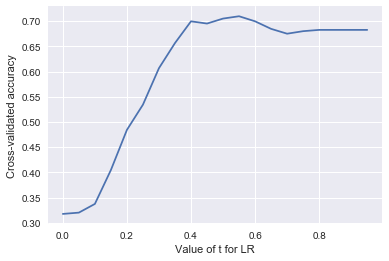

In [27]:
from sklearn.cross_validation import cross_val_score

arrayData = np.asarray(data)
X, y = arrayData[:, 1:], arrayData[:, 0]


t_range = np.arange(0.0, 1.0, 0.05)
t_scores = []

for t in t_range:
    clf = linear_model.LogisticRegression(C=1e5)
    wrapp = estimatorWrapper(t, clf)
    scores = cross_val_score(wrapp, X, y, cv=10, scoring='accuracy')
    t_scores.append(scores.mean())
    
plt.close()

plt.plot(t_range, t_scores)
plt.xlabel('Value of t for LR')
plt.ylabel('Cross-validated accuracy')

plt.show()